# GroupBy

### Split, apply, combine
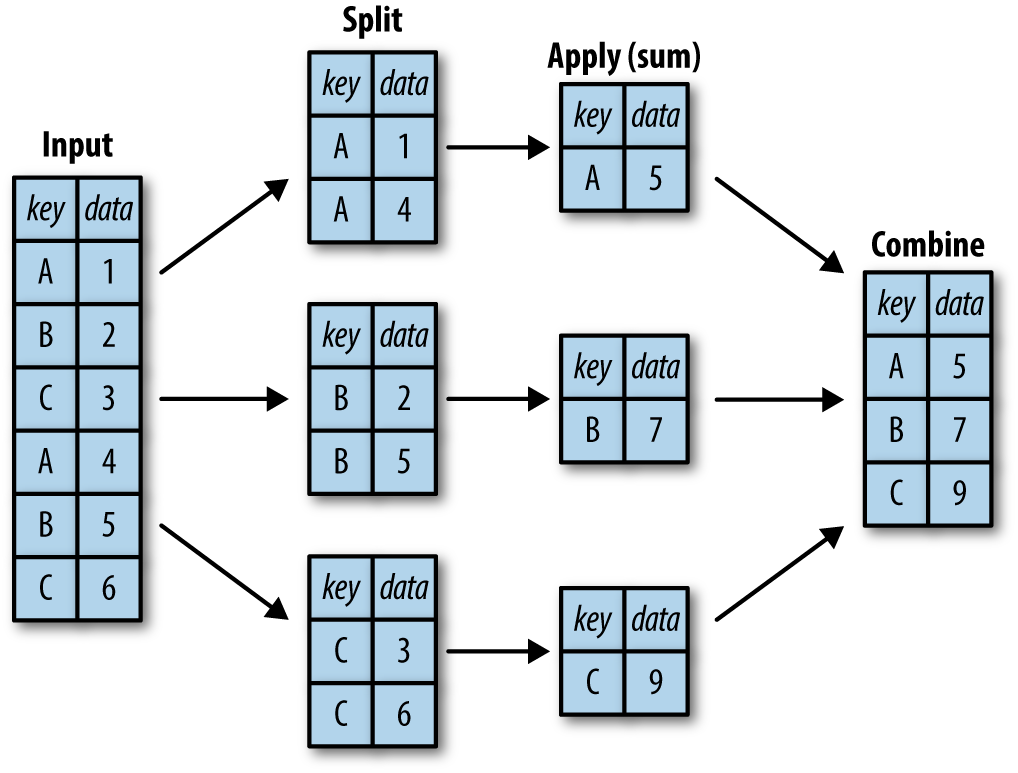


pd.groupby is use to do these steps automatically.
we no need to care about this and groupby will do it automatically

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'key' : ['A', 'B','C','A','B','C'],
                  'data' : range(6)}, columns =['key','data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [3]:
#compute the basic split-apply-combine using Groupby
df.groupby('key')

In [4]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


#### aggregate, filter, transform,apply

In [8]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B','C','A','B','C'],
                  'data1': range(6),
                  'data2': rng.randint(0,10,6)},
                 columns = ['key','data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [9]:
#aggregation
df.groupby('key').aggregate(['min',np.median,max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [19]:
#filter
#it allows to drop data based on the group properties.



def filter_func(x):
    return x['data2'].std() > 4

print(df); print(df.groupby('key').std());

print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


# Scales

In [20]:
df = pd.DataFrame(['A+', 'A','A-', 'B+', 'B','B-','C+','C','C-','D+','D'],
                 index = ['excellent','excellent', 'excellent','good','good','good','ok','ok','ok','poor','poor'])
df.rename(columns={0: 'Grades'}, inplace = True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [22]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [27]:
grades = df['Grades'].astype('category',
                            categories = ['D','D+', 'C-','C','C+','B-','B','B+','A-','A','A+'])
grades.head()

TypeError: astype() got an unexpected keyword argument 'categories'

In [30]:
Grades > 'C'

NameError: name 'Grades' is not defined